In [1]:
from __future__ import print_function
from findSurfaceResidues import *
from pymol import cmd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def countFrequency(my_list):
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

In [3]:
plt.rcParams["figure.figsize"] = [20, 4]
plt.rcParams["figure.autolayout"] = True

## Extract surface residue data and save plots

Enter directory name: model_structures
7ef9.pdb; progress: 1/27
3u2o.pdb; progress: 2/27
1ao0.pdb; progress: 3/27
4ct5.pdb; progress: 4/27
.DS_Store; progress: 5/27
5vfs.pdb; progress: 6/27
1d2e.pdb; progress: 7/27
5hms.pdb; progress: 8/27
2c9y.pdb; progress: 9/27
3aqq.pdb; progress: 10/27
6lbp.pdb; progress: 11/27
2a7r.pdb; progress: 12/27
5ivl.pdb; progress: 13/27
5exk.pdb; progress: 14/27
3dme.pdb; progress: 15/27
2i4i.pdb; progress: 16/27
7o6y.pdb; progress: 17/27
5zc9.pdb; progress: 18/27
1ne7.pdb; progress: 19/27
4r8k.pdb; progress: 20/27
4o5h.pdb; progress: 21/27
5kia.pdb; progress: 22/27
5kgn.pdb; progress: 23/27
2db3.pdb; progress: 24/27
4v67.pdb; progress: 25/27
3qe3.pdb; progress: 26/27
4nho.pdb; progress: 27/27


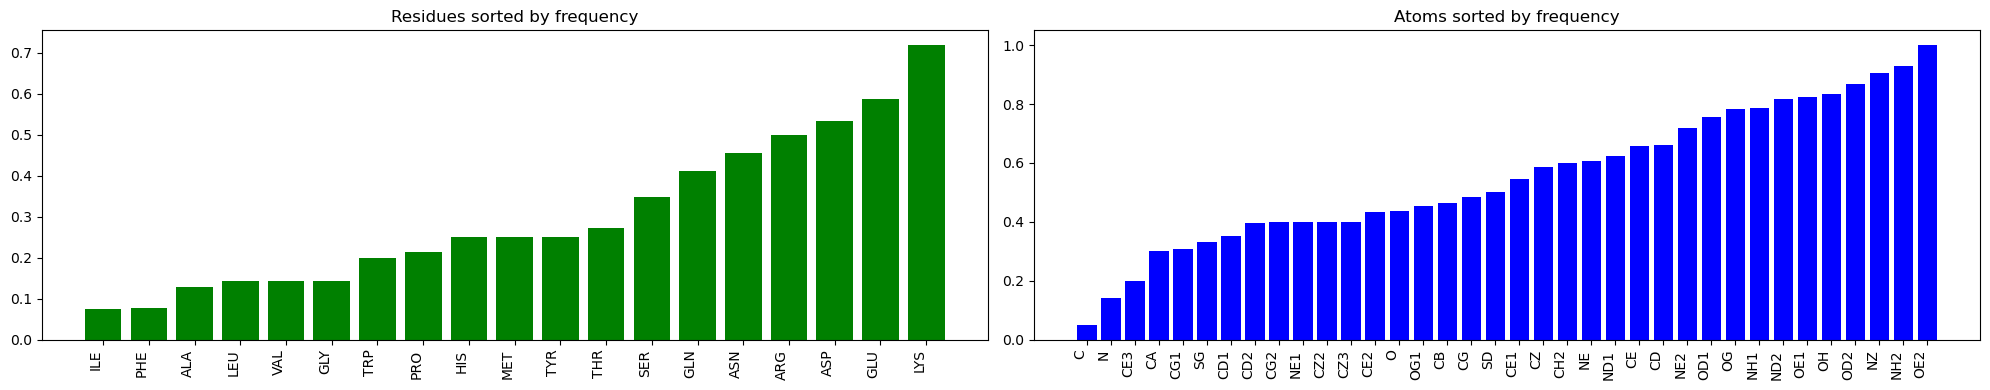

In [4]:
protein_dir = input('Enter directory name: ') 
proteins = os.listdir(protein_dir)

for count, protein in enumerate(proteins):
    print(protein+"; progress: "+str(count + 1)+"/"+str(len(proteins)))
    
    if protein == ".DS_Store":
        continue
        
    path = os.path.join(protein_dir, protein)
    cmd.load(path)

    # get residue data:
    residues = findSurfaceResidues(cutoff = 30)
    residues = [res[2] for res in residues]

    total_residues = countTotalResidues()
    total_residues = [res[2] for res in total_residues]

    residue_data = countFrequency(residues)
    residue_totals = countFrequency(total_residues)

    residue_freq_data = {}
    for key in residue_data.keys():
        residue_freq_data[key] = residue_data[key] / residue_totals[key]

    residue_names = list(residue_data.keys())
    residue_values = list(residue_data.values())

    residue_freq_df = pd.DataFrame(
       dict(
          names=residue_names,
          vals=list(residue_freq_data.values())
       )
    )
    
    residue_df = pd.DataFrame(
       dict(
          names=residue_names,
          vals=residue_values
       )
    )

    # get atom data:
    atoms = getSurfaceAtoms()
    atoms = [atom[1] for atom in atoms]

    total_atoms = getTotalAtoms()
    total_atoms = [atom[1] for atom in total_atoms]

    atom_data = countFrequency(atoms)
    atom_totals = countFrequency(total_atoms)

    atom_freq_data = {}
    for key in atom_data.keys():
        atom_freq_data[key] = atom_data[key] / atom_totals[key]

    atom_names = list(atom_data.keys())
    atom_values = list(atom_data.values())

    atom_freq_df = pd.DataFrame(
       dict(
          names=atom_names,
          vals=list(atom_freq_data.values())
       )
    )
    
    atom_df = pd.DataFrame(
       dict(
          names=atom_names,
          vals=atom_values
       )
    )
    
    plt.clf()

    # plot raw data
    plt.rcParams["figure.figsize"] = [20, 4]
    plt.rcParams["figure.autolayout"] = True
    
    plt.subplot(121)
    plt.bar('names', 'vals', data=residue_df.sort_values('vals'), color='green')
    plt.title("Residues sorted by Count") 
    plt.xticks(rotation=90, ha='right')

    plt.subplot(122)
    plt.bar('names', 'vals', data=atom_df.sort_values('vals'), color='blue')
    plt.title("Atoms sorted by Count") 
    plt.xticks(rotation=90, ha='right')
    
    if not os.path.isdir(protein_dir+"_graphs/"+protein):
        os.makedirs(protein_dir+"_graphs/"+protein)
    
    plt.savefig(protein_dir+"_graphs/"+protein+"/counts.png")
    
    plt.clf()
    
    # plot frquency data
    plt.rcParams["figure.figsize"] = [20, 4]
    plt.rcParams["figure.autolayout"] = True

    plt.subplot(121)
    plt.bar('names', 'vals', data=residue_freq_df.sort_values('vals'), color='green')
    plt.title("Residues sorted by frequency") 
    plt.xticks(rotation=90, ha='right')

    plt.subplot(122)
    plt.bar('names', 'vals', data=atom_freq_df.sort_values('vals'), color='blue')
    plt.title("Atoms sorted by frequency") 
    plt.xticks(rotation=90, ha='right')
    
    plt.savefig(protein_dir+"_graphs/"+protein+"/frequencies.png")

    cmd.delete('all')

## Count total residues in each directory

7ef9.pdb; progress: 1/27
3u2o.pdb; progress: 2/27
1ao0.pdb; progress: 3/27
4ct5.pdb; progress: 4/27
.DS_Store; progress: 5/27
5vfs.pdb; progress: 6/27
1d2e.pdb; progress: 7/27
5hms.pdb; progress: 8/27
2c9y.pdb; progress: 9/27
3aqq.pdb; progress: 10/27
6lbp.pdb; progress: 11/27
2a7r.pdb; progress: 12/27
5ivl.pdb; progress: 13/27
5exk.pdb; progress: 14/27
3dme.pdb; progress: 15/27
2i4i.pdb; progress: 16/27
7o6y.pdb; progress: 17/27
5zc9.pdb; progress: 18/27
1ne7.pdb; progress: 19/27
4r8k.pdb; progress: 20/27
4o5h.pdb; progress: 21/27
5kia.pdb; progress: 22/27
5kgn.pdb; progress: 23/27
2db3.pdb; progress: 24/27
4v67.pdb; progress: 25/27
3qe3.pdb; progress: 26/27
4nho.pdb; progress: 27/27


/Users/roshanklein-seetharaman/miniforge3/envs/proteins/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


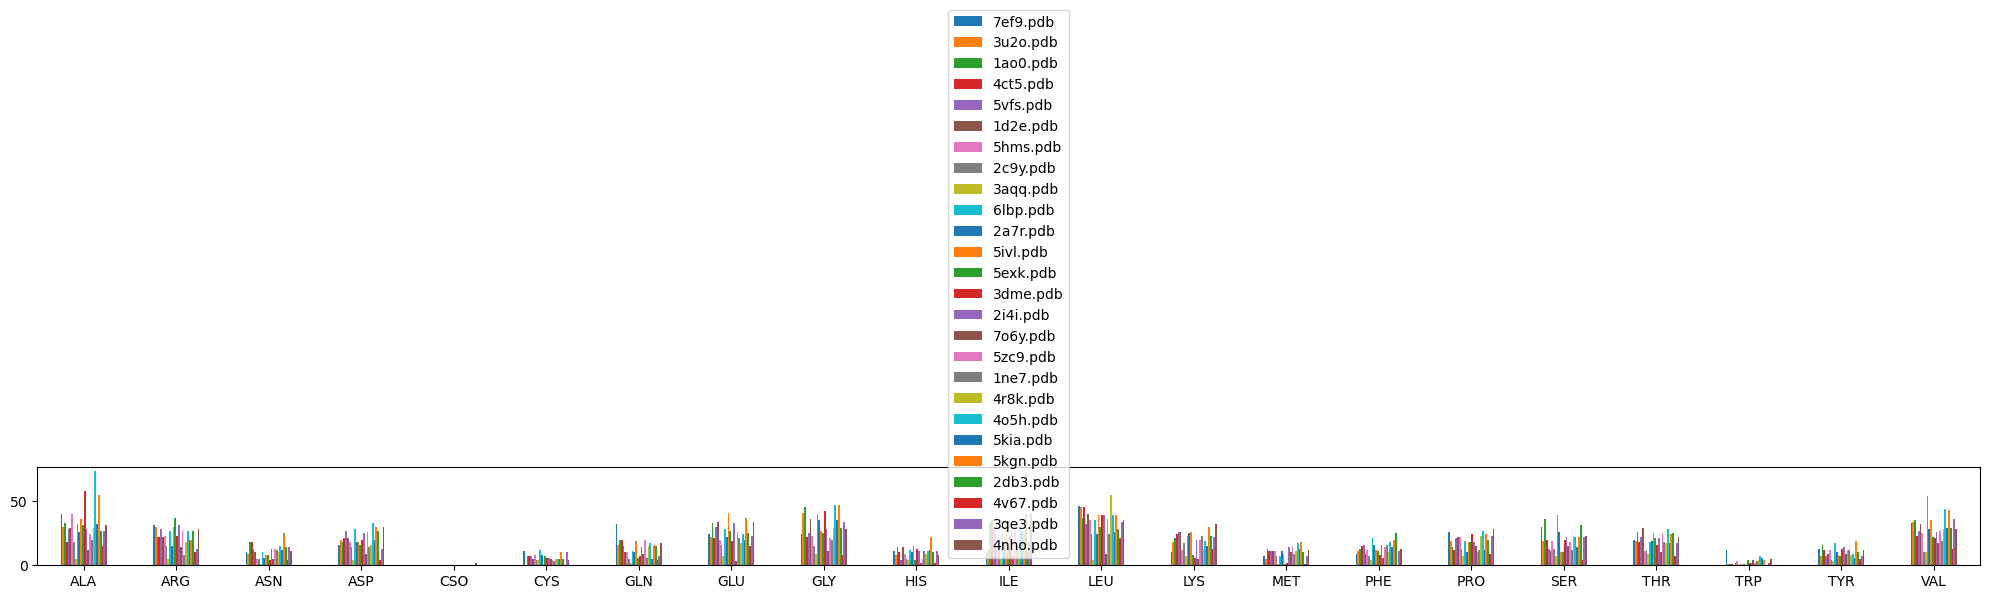

In [5]:
dct = {}

for count, protein in enumerate(proteins):
    print(protein+"; progress: "+str(count + 1)+"/"+str(len(proteins)))
    
    if protein == ".DS_Store":
        continue
        
    path = os.path.join(protein_dir, protein)
    cmd.load(path)
    
    total_residues = countTotalResidues()
    total_residues = [res[2] for res in total_residues]
    residue_totals = countFrequency(total_residues)
    
    dct[protein] = pd.Series(residue_totals)
    
    cmd.delete('all')
    
df = pd.DataFrame(dct)
df = df.fillna(0)
ax = df.plot.bar(rot=0)

fig = ax.get_figure()
fig.savefig(protein_dir+"_graphs/total_residues")